In [ ]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
!pip install tsaug
import tsaug
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/.shortcut-targets-by-id/1P30vJneHCcHYRXSdPohIUrur_apd8Dgb/Deliverable

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1P30vJneHCcHYRXSdPohIUrur_apd8Dgb/Deliverable


In [ ]:
df_diagnostics = pd.read_excel('Diagnostics.xlsx')
df_diagnostics.shape

(10646, 16)

In [ ]:
df_diagnostics.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [ ]:
df_diagnostics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10646 entries, 0 to 10645
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FileName         10646 non-null  object
 1   Rhythm           10646 non-null  object
 2   Beat             10646 non-null  object
 3   PatientAge       10646 non-null  int64 
 4   Gender           10646 non-null  object
 5   VentricularRate  10646 non-null  int64 
 6   AtrialRate       10646 non-null  int64 
 7   QRSDuration      10646 non-null  int64 
 8   QTInterval       10646 non-null  int64 
 9   QTCorrected      10646 non-null  int64 
 10  RAxis            10646 non-null  int64 
 11  TAxis            10646 non-null  int64 
 12  QRSCount         10646 non-null  int64 
 13  QOnset           10646 non-null  int64 
 14  QOffset          10646 non-null  int64 
 15  TOffset          10646 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 1.3+ MB


In [ ]:
df_diagnostics.isna().sum()

FileName           0
Rhythm             0
Beat               0
PatientAge         0
Gender             0
VentricularRate    0
AtrialRate         0
QRSDuration        0
QTInterval         0
QTCorrected        0
RAxis              0
TAxis              0
QRSCount           0
QOnset             0
QOffset            0
TOffset            0
dtype: int64

In [ ]:
df_diagnostics['Rhythm'].value_counts()

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64

## Exploratory Data Analysis

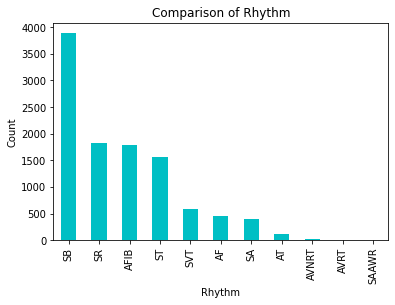

In [ ]:
df_diagnostics['Rhythm'].value_counts(dropna = False).plot.bar(color = '#00bfc4')
plt.title('Comparison of Rhythm')
plt.xlabel('Rhythm')
plt.ylabel('Count')
plt.show()

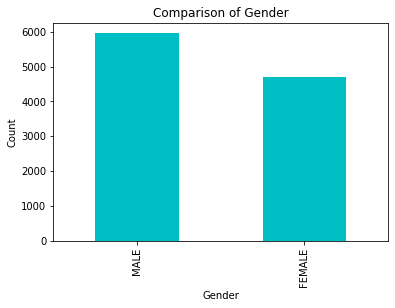

In [ ]:
df_diagnostics['Gender'].value_counts(dropna = False).plot.bar(color = '#00bfc4')
plt.title('Comparison of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
totalagegroupcount = []
Rythoncat = ['SB','SR','AFIB','ST','SVT','AF','SA','AT','AVNRT','AVRT','ASSWR']
for cat in Rythoncat:
    df = df_diagnostics[df_diagnostics['Rhythm'] == cat]
    agebin_0_10 = 0
    agebin_10_20 = 0
    agebin_20_30 = 0
    agebin_30_40 = 0
    agebin_50_above = 0
    print(cat)
    for index, row in df.iterrows():
        if row['Rhythm'] == cat:
            if 0 < row['PatientAge'] <= 10:
                    agebin_0_10 += 1
            if 10 < row['PatientAge'] <= 20:
                agebin_10_20 += 1
            if 20 <= row['PatientAge'] <= 30:
                agebin_20_30 += 1
            if 40 <= row['PatientAge'] <= 50:
                agebin_30_40 += 1
            else:
                agebin_50_above += 1
    totalagegroupcount.append([agebin_0_10,agebin_10_20,agebin_20_30,agebin_30_40,agebin_50_above])

print(totalagegroupcount)

SB
SR
AFIB
ST
SVT
AF
SA
AT
AVNRT
AVRT
ASSWR
[[2, 38, 145, 619, 3270], [4, 32, 147, 345, 1481], [0, 0, 2, 57, 1723], [54, 63, 153, 221, 1347], [2, 13, 53, 121, 466], [0, 0, 3, 31, 414], [70, 73, 71, 44, 355], [4, 2, 5, 5, 116], [0, 0, 2, 0, 16], [0, 0, 1, 2, 6], [0, 0, 0, 0, 0]]


### Data Cleaning

In [ ]:
df_diagnostics = df_diagnostics.dropna() #drop null values
df_diagnostics = df_diagnostics.drop_duplicates(subset=['FileName']) # drop duplicates
df_diagnostics = df_diagnostics.drop(['Beat'], axis=1) # Dropping unwanted 'Beat' col
df_diagnostics = df_diagnostics.reset_index(drop = True) # reset index
df_diagnostics.shape

(10646, 15)

### Data Balancing

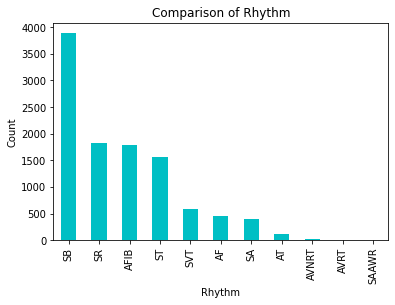

In [ ]:
df_diagnostics['Rhythm'].value_counts(dropna = False).plot.bar(color = '#00bfc4')
plt.title('Comparison of Rhythm')
plt.xlabel('Rhythm')
plt.ylabel('Count')
plt.show()

In [ ]:
sampletimes = 100

SBcount,SRcount,AFIBcount,STcount,SVTcount,AFcount,SAcount,ATcount,AVNRTcount,AVRTcount,SAAWRcount  = df_diagnostics['Rhythm'].value_counts()

df_SB = df_diagnostics[df_diagnostics['Rhythm'] == "SB"]
df_SR = df_diagnostics[df_diagnostics['Rhythm'] == "SR"]
df_AFIB = df_diagnostics[df_diagnostics['Rhythm'] == "AFIB"]
df_ST = df_diagnostics[df_diagnostics['Rhythm'] == "ST"]
df_SVT = df_diagnostics[df_diagnostics['Rhythm'] == "SVT"]
df_AF = df_diagnostics[df_diagnostics['Rhythm'] == "AF"]
df_SA = df_diagnostics[df_diagnostics['Rhythm'] == "SA"]
df_AT = df_diagnostics[df_diagnostics['Rhythm'] == "AT"]
df_AVNRT = df_diagnostics[df_diagnostics['Rhythm'] == "AVNRT"]
df_AVRT = df_diagnostics[df_diagnostics['Rhythm'] == "AVRT"]
df_SAAWR = df_diagnostics[df_diagnostics['Rhythm'] == "SAAWR"]

df_SB_under = df_SB.sample(sampletimes, replace=True)
df_SR_under = df_SR.sample(sampletimes, replace=True)
df_AFIB_under = df_AFIB.sample(sampletimes, replace=True)
df_ST_under = df_ST.sample(sampletimes, replace=True)
df_SVT_under = df_SVT.sample(sampletimes, replace=True)
df_AF_under = df_AF.sample(sampletimes, replace=True)
df_SA_under = df_SA.sample(sampletimes, replace=True)
df_AT_under = df_AT.sample(sampletimes, replace=True)
df_AVNRT_under = df_AVNRT.sample(sampletimes, replace=True)
df_AVRT_under = df_AVRT.sample(sampletimes, replace=True)
df_SAAWR_under = df_SAAWR.sample(sampletimes, replace=True)


df_diagnostics = pd.concat([df_SB_under, df_SR_under, df_AFIB_under, df_ST_under, df_SVT_under, df_AF_under, df_SA_under], axis=0)
df_diagnostics = df_diagnostics.sample(frac = 1)
df_diagnostics = df_diagnostics.reset_index(drop = True)
df_diagnostics

,FileName,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180115_124431_96000,ST,41,MALE,103,103,92,350,458,44,61,17,217,263,392
1,MUSE_20180116_121657_89000,AF,74,MALE,126,264,82,334,483,-55,71,20,222,263,389
2,MUSE_20180113_133858_01000,SB,56,FEMALE,53,53,86,424,397,71,31,8,218,261,430
3,MUSE_20180120_120935_38000,AFIB,76,MALE,80,62,86,424,489,44,267,13,221,264,433
4,MUSE_20180112_120553_84000,ST,78,MALE,133,133,132,346,514,87,-79,21,214,280,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,MUSE_20180114_120643_70000,SB,24,MALE,56,56,94,430,414,65,40,9,217,264,432
696,MUSE_20180116_122617_68000,SA,13,MALE,58,58,92,402,394,87,56,10,218,264,419
697,MUSE_20180118_174901_24000,SA,19,FEMALE,80,80,88,352,405,29,55,13,214,258,390
698,MUSE_20180118_131820_28000,AFIB,52,FEMALE,128,120,88,270,394,50,175,21,217,261,352


In [ ]:
df_diagnostics['Rhythm'].value_counts()

ST      100
AF      100
SB      100
AFIB    100
SA      100
SVT     100
SR      100
Name: Rhythm, dtype: int64

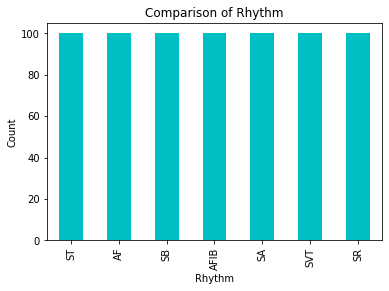

In [ ]:
df_diagnostics['Rhythm'].value_counts(dropna = False).plot.bar(color = '#00bfc4')
plt.title('Comparison of Rhythm')
plt.xlabel('Rhythm')
plt.ylabel('Count')
plt.show()

### Hot Encoding

In [ ]:
df_diagnostics.Rhythm = pd.Categorical(df_diagnostics.Rhythm)
df_diagnostics['Rhythm'] = df_diagnostics.Rhythm.cat.codes

df_diagnostics.Gender = pd.Categorical(df_diagnostics.Gender)
df_diagnostics['Gender'] = df_diagnostics.Gender.cat.codes

df_diagnostics

,FileName,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180115_124431_96000,5,41,1,103,103,92,350,458,44,61,17,217,263,392
1,MUSE_20180116_121657_89000,0,74,1,126,264,82,334,483,-55,71,20,222,263,389
2,MUSE_20180113_133858_01000,3,56,0,53,53,86,424,397,71,31,8,218,261,430
3,MUSE_20180120_120935_38000,1,76,1,80,62,86,424,489,44,267,13,221,264,433
4,MUSE_20180112_120553_84000,5,78,1,133,133,132,346,514,87,-79,21,214,280,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,MUSE_20180114_120643_70000,3,24,1,56,56,94,430,414,65,40,9,217,264,432
696,MUSE_20180116_122617_68000,2,13,1,58,58,92,402,394,87,56,10,218,264,419
697,MUSE_20180118_174901_24000,2,19,0,80,80,88,352,405,29,55,13,214,258,390
698,MUSE_20180118_131820_28000,1,52,0,128,120,88,270,394,50,175,21,217,261,352


In [ ]:
X = df_diagnostics.drop(['FileName','Rhythm'], axis=1)
y = df_diagnostics["Rhythm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
classifier = svm.SVC()
classifier.fit(X, y)

SVC()

In [ ]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("\n\n Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[ 8  1  0  0  0  5  8]
 [ 1  1  0  5  5  6  3]
 [ 0  0 13  3  4  1  0]
 [ 0  0  0 15  0  0  0]
 [ 0  1  5  4 15  2  0]
 [ 1  0  0  0  0 17  0]
 [ 0  0  0  0  0  1 15]]


 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.36      0.50        22
           1       0.33      0.05      0.08        21
           2       0.72      0.62      0.67        21
           3       0.56      1.00      0.71        15
           4       0.62      0.56      0.59        27
           5       0.53      0.94      0.68        18
           6       0.58      0.94      0.71        16

    accuracy                           0.60       140
   macro avg       0.59      0.64      0.56       140
weighted avg       0.60      0.60      0.55       140



In [ ]:
print("Actual:     ",y_test[10:20].values)
print("Predicted: ",classifier.predict(X_test[10:20]))

Actual:      [6 4 2 1 4 0 2 3 5 1]
Predicted:  [6 4 5 4 4 6 2 3 5 0]


## Single Subject Demo

In [ ]:
zf = zipfile.ZipFile('ECGData.zip')
ecg12 = pd.read_csv(zf.open('ECGData/MUSE_20180210_120005_91000.csv'))
ecg12.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-43.92,-39.04,4.88,43.92,-24.40,-19.52,-14.64,-4.88,-58.56,-9.76,-117.12,-9.76
1,-48.80,-48.80,0.00,48.80,-24.40,-24.40,-9.76,4.88,-82.96,4.88,-126.88,-53.68
2,-68.32,-58.56,9.76,63.44,-39.04,-24.40,-14.64,19.52,-92.72,0.00,-136.64,-68.32
3,-73.20,-73.20,0.00,73.20,-39.04,-39.04,-14.64,29.28,-73.20,-4.88,-126.88,-48.80
4,-48.80,-43.92,4.88,48.80,-29.28,-19.52,-9.76,48.80,-19.52,19.52,-78.08,-87.84


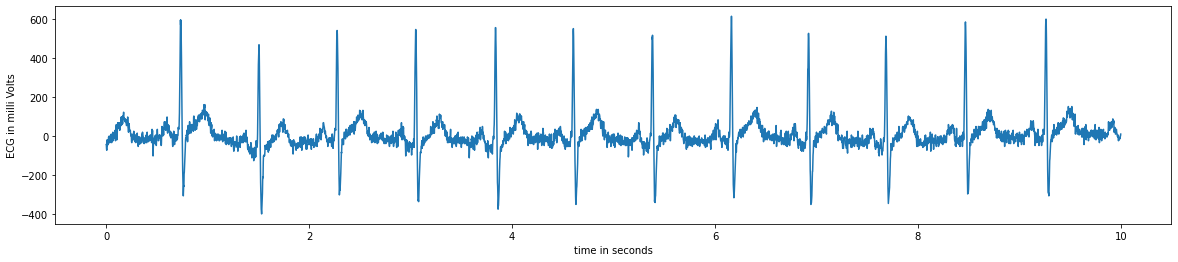

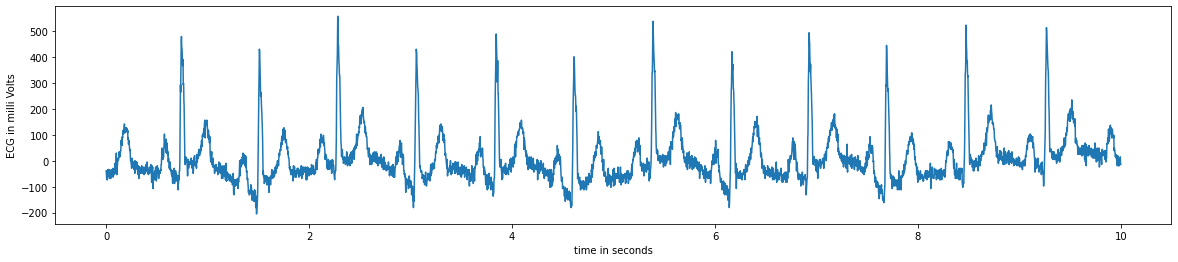

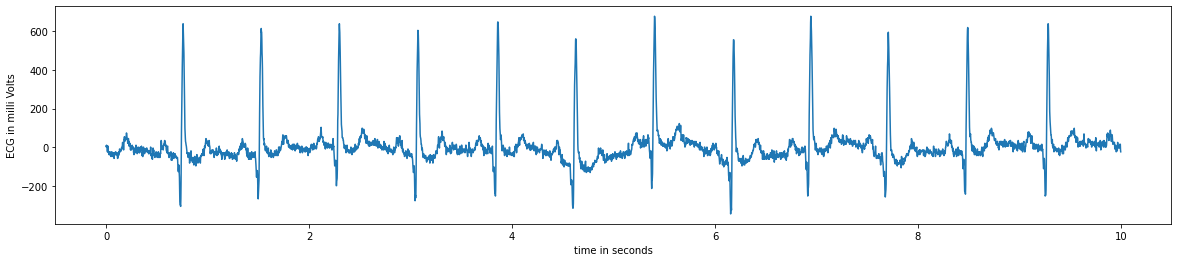

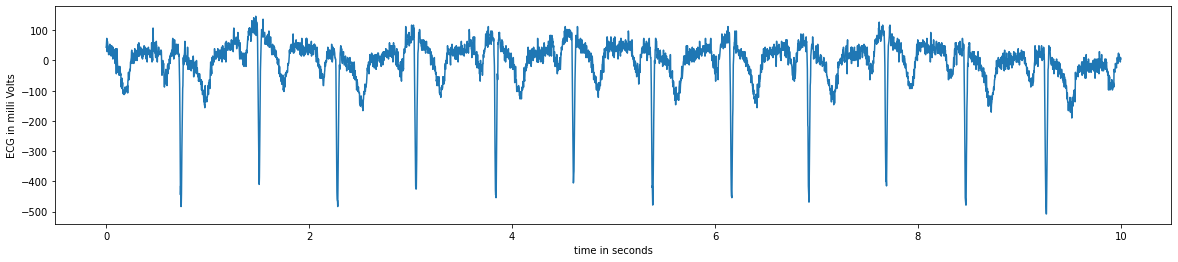

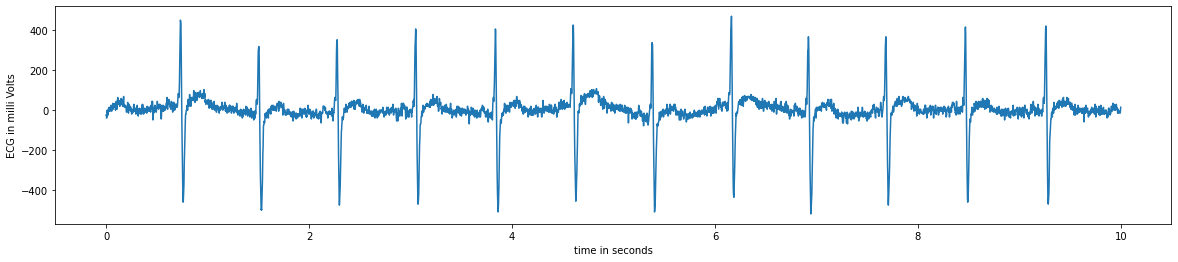

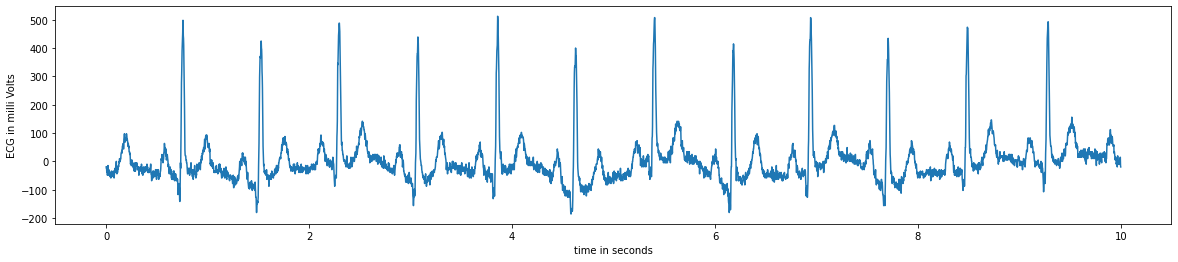

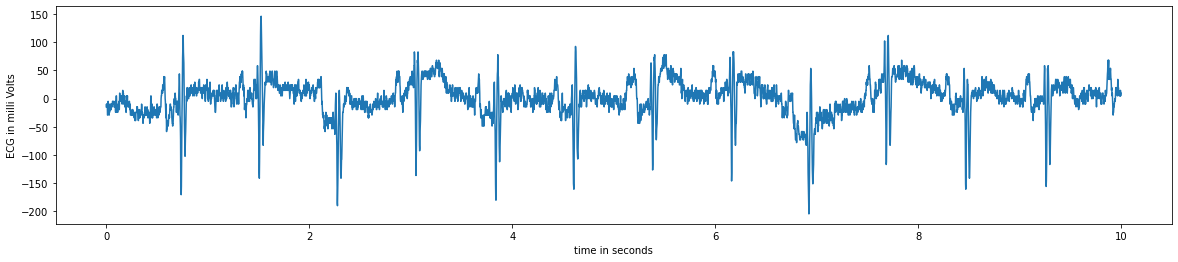

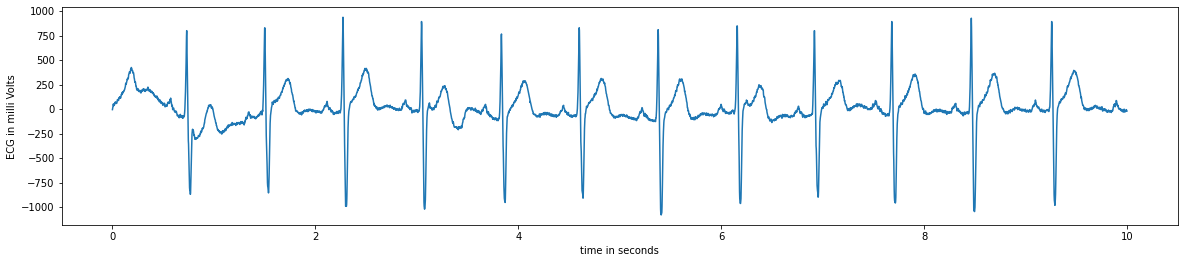

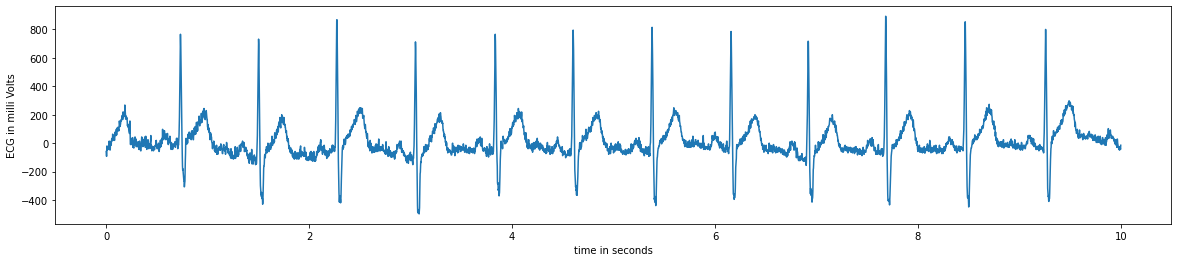

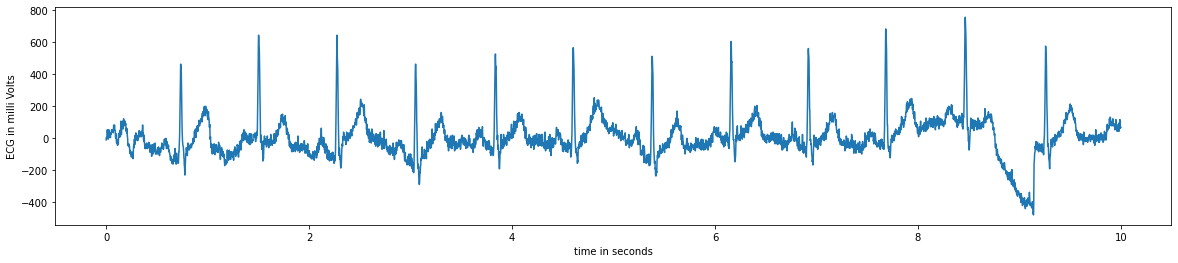

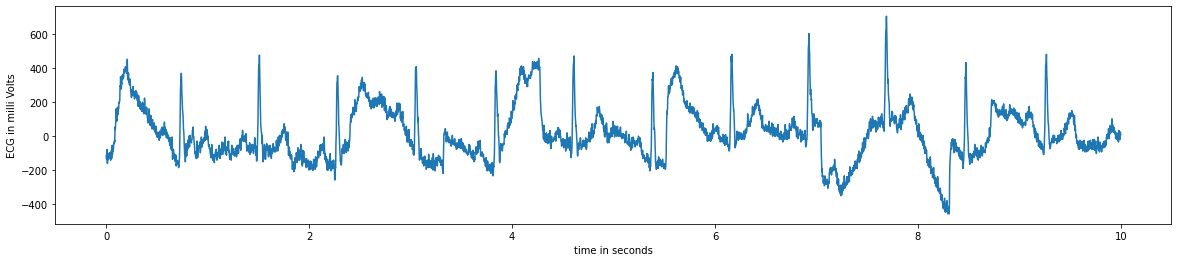

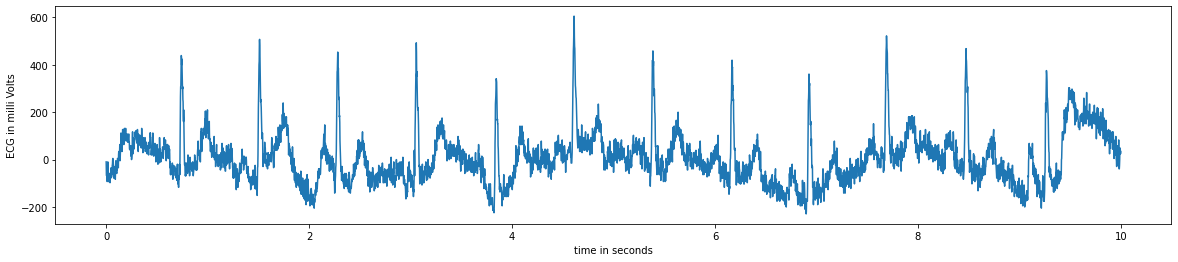

In [ ]:
for col in ecg12.columns:
    frequency = 500
    time_data = np.arange(ecg12[col].size) / frequency

    fig = plt.figure(figsize = (20, 4))
    plt.plot(time_data, ecg12[col])
    plt.xlabel("time in seconds")
    plt.ylabel("ECG in milli Volts")
    # plt.xlim(9, 10.2)
    # plt.ylim(-1, 1.5)
    # plt.title()
    plt.show()


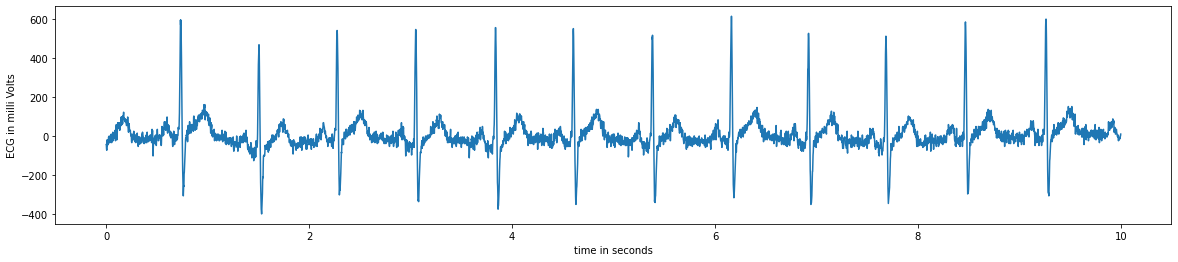

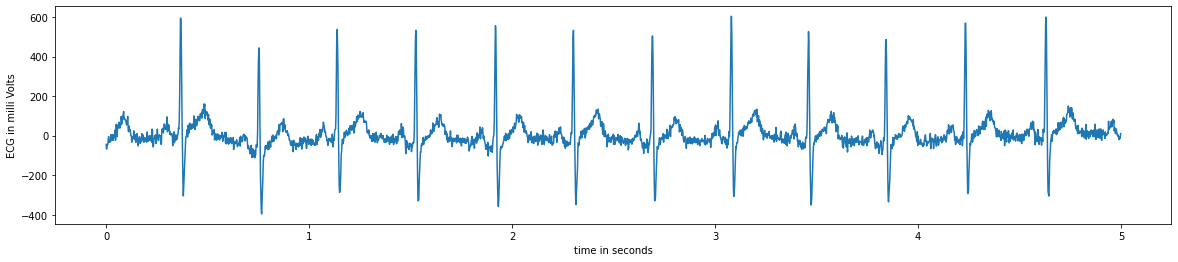

In [ ]:
data = ecg12['I']
frequency = 500

time_data = np.arange(data.size) / frequency
fig = plt.figure(figsize = (20, 4))
plt.plot(time_data, data.values)
plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")
plt.show()

X_aug_resize , Y_aug_resize = tsaug.Resize(size=2500).augment(time_data, data.values)
X_aug, Y_aug = tsaug.AddNoise(scale=0.1).augment(X_aug_resize, Y_aug_resize)


time_data = np.arange(Y_aug.size) / frequency
fig = plt.figure(figsize = (20, 4))
plt.plot(time_data, Y_aug)
plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")
plt.show()

## Multi Subjects

## Deep learning model for ECG LEAD I

In [ ]:
import tensorflow as tf
!pip install keras-tuner --upgrade
from kerastuner import RandomSearch
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, AveragePooling1D, Conv1DTranspose, MaxPooling1D, Flatten, Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.5 MB/s eta 0:00:00


<ipython-input-24-30c2f884ff49>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
allecg = []
lead = 'I'
for filename in df_diagnostics["FileName"]:
    ecg12 = pd.read_csv(zf.open('ECGData/'+filename+'.csv'))
    data = ecg12[lead]
    time_data = np.arange(data.size) / frequency
    X_aug_resize , Y_aug_resize = tsaug.Resize(size=2500).augment(time_data, data.values)
    X_aug, Y_aug = tsaug.AddNoise(scale=0.5).augment(X_aug_resize, Y_aug_resize)
    allecg.append(np.transpose([Y_aug]))

In [ ]:
X = np.array(allecg,dtype='float32')
y = np.array(df_diagnostics["Rhythm"])
print(X.shape,y.shape)

(700, 2500, 1) (700,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(560, 2500, 1) (560,)
(140, 2500, 1) (140,)


In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Conv1D(filters=64, kernel_size=10, activation='relu'))
  model.add(MaxPooling1D(pool_size=5))

  for i in range(hp.Int('Covnv1D_layers', 1, 20)):
    model.add(Conv1D(filters=hp.Int('Conv1D_' + str(i), min_value=32, max_value=1024, step=16),kernel_size=hp.Choice('kernel_' + str(i), values = [3,10]),activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))

  model.add(MaxPooling1D(pool_size=15))

  for j in range(hp.Int('LSTM_layers', 1, 20)):
    model.add(LSTM(hp.Int('LSTM_' + str(j), min_value=32, max_value=2048, step=16),activation='tanh', return_sequences=True))

  model.add(Flatten())

  for k in range(hp.Int('Dense_layers', 1, 20)):
    model.add(Dense(hp.Int('Dense_' + str(k), min_value=32, max_value=1024, step=16),activation='relu'))

  model.add(Dense(7, activation='softmax'))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-4])), metrics = ['accuracy'])
  return model

In [ ]:
tuner = RandomSearch(build_model,objective = 'val_accuracy',max_trials = 5,executions_per_trial = 3,)
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
print(tuner.results_summary())

Trial 2 Complete [00h 01m 40s]
val_accuracy: 0.3071428636709849

Best val_accuracy So Far: 0.3071428636709849
Total elapsed time: 00h 01m 40s
Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
Covnv1D_layers: 1
Conv1D_0: 128
kernel_0: 3
act_0: relu
LSTM_layers: 4
LSTM_0: 1808
Dense_layers: 14
Dense_0: 208
learning_rate: 0.0001
Conv1D_1: 368
kernel_1: 10
act_1: relu
Conv1D_2: 672
kernel_2: 10
act_2: relu
Conv1D_3: 752
kernel_3: 3
act_3: sigmoid
Conv1D_4: 896
kernel_4: 3
act_4: relu
Conv1D_5: 400
kernel_5: 10
act_5: relu
LSTM_1: 848
LSTM_2: 464
LSTM_3: 688
LSTM_4: 1856
LSTM_5: 640
Dense_1: 976
Dense_2: 304
Dense_3: 896
Dense_4: 768
Dense_5: 768
Dense_6: 912
Dense_7: 976
Dense_8: 784
Dense_9: 1008
Dense_10: 704
Dense_11: 544
Dense_12: 96
Dense_13: 752
Dense_14: 944
Dense_15: 512
Dense_16: 720
Dense_17: 128
Score: 0.3071428636709849
Trial summary
Hyperparameters:
Covnv1D_layers: 6
Conv1D_0: 304
kernel_0: 10
act_0: relu
LSTM_layers: 6
LSTM_0:

In [ ]:
model=tuner.get_best_models(num_models=1)[0]
model.build(input_shape=(560, 2500, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (560, 2491, 64)           704       
                                                                 
 max_pooling1d (MaxPooling1D  (560, 498, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (560, 496, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (560, 33, 128)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (560, 33, 1808)           14008384  
                                                                 
 lstm_1 (LSTM)               (560, 33, 848)            9

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/50
18/18 [==============================] - 10s 194ms/step - loss: 1.2836 - accuracy: 0.4786 - val_loss: 1.3262 - val_accuracy: 0.4143
Epoch 2/50
18/18 [==============================] - 2s 94ms/step - loss: 1.2574 - accuracy: 0.4857 - val_loss: 1.4997 - val_accuracy: 0.3786
Epoch 3/50
18/18 [==============================] - 2s 94ms/step - loss: 1.3230 - accuracy: 0.4196 - val_loss: 1.3576 - val_accuracy: 0.4286
Epoch 4/50
18/18 [==============================] - 2s 95ms/step - loss: 1.1978 - accuracy: 0.5214 - val_loss: 1.6129 - val_accuracy: 0.3786
Epoch 5/50
18/18 [==============================] - 2s 96ms/step - loss: 1.2478 - accuracy: 0.4821 - val_loss: 1.3547 - val_accuracy: 0.3500
Epoch 6/50
18/18 [==============================] - 2s 95ms/step - loss: 1.1410 - accuracy: 0.5304 - val_loss: 1.3110 - val_accuracy: 0.3786
Epoch 7/50
18/18 [==============================] - 2s 95ms/step - loss: 1.0564 - accuracy: 0.5357 - val_loss: 1.9881 - val_accuracy: 0.3714
Epoch 8/50


In [ ]:
score = model.evaluate(X_test, y_test)
print("Test Loss: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

5/5 [==============================] - 0s 32ms/step - loss: 1.4653 - accuracy: 0.5643
Test Loss: 146.53%
Test Accuracy: 56.43%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


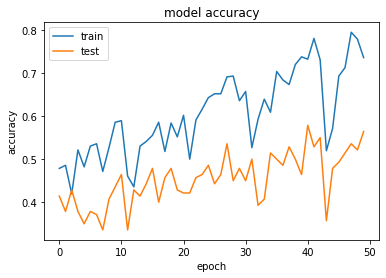

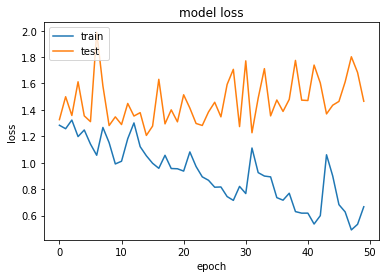

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
dataindex = 6
xtest = np.array([X_test[dataindex]])
predicted = model.predict(xtest)

print("Actual:     ",y_test[dataindex])
print("Predicted:  ",np.argmax(predicted))

1/1 [==============================] - 1s 1s/step
Actual:      3
Predicted:   3
